In [1]:
# definition
# machin learning > deep learning
# training - validation(for tunning model) - testing
# hyperparameter -> user can regulate it 
# parameter -> when model training, model change automatically.
# regression(linear regression), classification(logistic regression) -> binary classification / multi-class classification
# supervised learning(with answer) / unsupervised learning(with no answer) / reinforce learning
# sample(one row), feature(variable x)
# confusion matrix -> accuracy don't provide correct prediction, incorrect prediction. confusion matrix provide prediction in detail.
# T(correct prediction) F(incorrect prediction) P(positive) F(negative)
# precision -> positive case in all of response positive case -> TP / (TP + FP)
# recall -> positive case in all of actual positive case -> TP / (TP + FN)
# overfitting(overtraining) / underfitting(undertraining)

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import numpy as np
from torch import optim
%matplotlib inline
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
# perceptron -> initial neutral network way. multiple input, one output algorithm
# logistic regression(sigmoid) -> perception one activate function
# single layer perceptron
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
# XOR data
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
linear = nn.Linear(2,1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(step, cost.item())
# single layer perceptron can't resolve XOR problem.
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

0 0.7273974418640137
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996
모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [4]:
# multi layer perceptron
# Neural Network Overview -> input layer / hidden layer(sigmoid) / output layer(sigmoid)
# forward propagation(input layer -> output layer) -> backward propagation step1(output layer -> input layer) -> backward propagation step2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
# XOR probelm data
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
# three hidden layer & output layer
model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
    ).to(device)
# cost function & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(epoch, cost.item())
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())
print(list(model.parameters()))

0 0.6948983669281006
1000 0.6931379437446594
2000 0.6931172609329224
3000 0.6930763721466064
4000 0.6929103136062622
5000 0.6820822358131409
6000 0.0012996583245694637
7000 0.0004833652637898922
8000 0.00028891698457300663
9000 0.00020375008170958608
10000 0.00015648972475901246
모델의 출력값(Hypothesis):  [[1.1173233e-04]
 [9.9982893e-01]
 [9.9984252e-01]
 [1.8558851e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
[Parameter containing:
tensor([[-1.3060, -0.6899],
        [-0.4717, -0.5716],
        [ 0.8901,  0.9902],
        [ 0.5510,  0.2572],
        [ 4.2790, -2.4804],
        [ 0.0921,  0.9000],
        [-1.3781,  2.9243],
        [ 5.3332,  5.3745],
        [ 1.7332, -3.1540],
        [ 1.3806,  1.4408]], requires_grad=True), Parameter containing:
tensor([ 1.0597, -0.3195, -1.0387, -0.7083,  0.9477,  0.1631,  0.5985, -1.7860,
        -0.8480, -2.0306], requires_grad=True), Parameter containing:
tensor([[-0.0290,  0.0687, -0.19

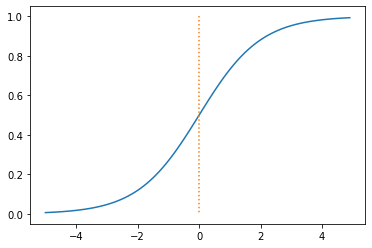

In [5]:
# Activation function -> sigmoid, softmax, ReLU, ..., Nonlinear function
# sigmoid vanishing gradient -> when near 0 or 1, gradient is more near 0. then back propagation step, can not receive gradient will receive almost 0 gradient.
# and then W parameter can not update. it is the problem when use sigmoid in hidden layer.
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.plot([0,0], [1.0, 0.0], ':')
plt.show()

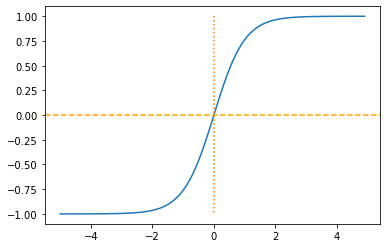

In [6]:
# Hyperbolic tangent function -> it have same problem like sigmoid function
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.show()

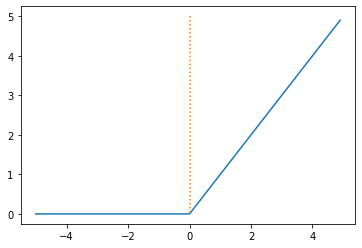

In [7]:
# ReLU function -> f(x) = max(0,x) -> negative is 0, positive is same value of input.
# it is calculate fast. but negative gradient is 0. this problem is dying ReLU.
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.show()

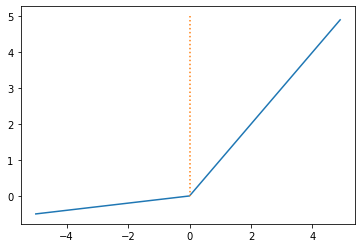

In [8]:
# Leaky ReLU -> similar ReLU. but negative is very small value. f(x) = max(ax, x)
a = 0.1
def leaky_relu(x):
    return np.maximum(a * x, x)
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)
plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.show()

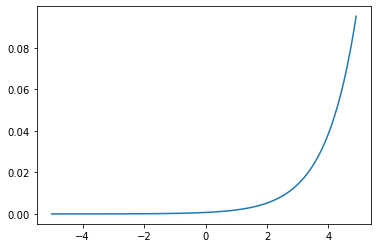

In [9]:
# softmax function
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))
plt.plot(x, y)
plt.show()

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
전체 샘플의 수 : 1797


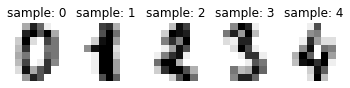

In [10]:
# handwriting with multi layer perceptron
# initialize
digits = load_digits()
print(digits.images[0])
print(digits.target[0])
print(digits.data[0])
print('전체 샘플의 수 : {}'.format(len(digits.images)))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

Epoch    0/100 Cost: 2.325919
Epoch  100/100 Cost: 0.185178
Epoch  200/100 Cost: 0.039380
Epoch  300/100 Cost: 0.012111
Epoch  400/100 Cost: 0.004902
Epoch  500/100 Cost: 0.002539
Epoch  600/100 Cost: 0.001539
Epoch  700/100 Cost: 0.001031
Epoch  800/100 Cost: 0.000737
Epoch  900/100 Cost: 0.000552


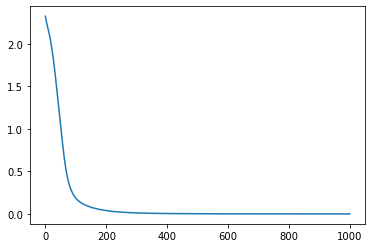

In [11]:
# assign X, Y
X = digits.data
Y = digits.target
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)
# model
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
# cost function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))
    losses.append(loss.item())
plt.plot(losses)
plt.show()

In [12]:
# MNIST with multi layer perceptron
# data import
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data = mnist.data.to_numpy()
mnist.target = mnist.target.astype(np.int8)

5


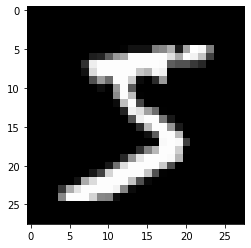

In [13]:
# input data
X = mnist.data / 255
y = mnist.target
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print(y[0])
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test.values)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)
# model
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28 * 28 * 1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
# cost function & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# training
def train(epoch):
    model.train()
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
    print('epoch{} :완료'.format(epoch + 1))
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 840/10000 (8%)

epoch1 :완료
epoch2 :완료
epoch3 :완료

테스트 데이터에서 예측 정확도: 9624/10000 (96%)

tensor(2)
이 이미지 데이터의 정답 레이블은 2입니다


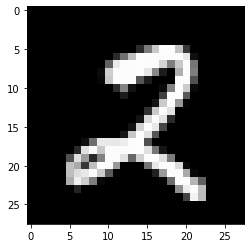

In [14]:
# test model
# initinal accuracy
test()
# training
for epoch in range(3):
    train(epoch)
# after accuracy
test()
index = 2018
model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)
print(predicted)
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

In [ ]:
# prevent overfitting way
# 1. increase data
# 2. decrease complexity of model
# class Architecture1(nn.Module):
#   def __init__(self, input_size, hidden_size, num_classes):
#     super(Architecture1, self).__init__()
#     self.fc1 = nn.Linear(input_size, hidden_size)
#     self.relu = nn.ReLU()
#     self.fc2 = nn.Linear(hidden_size, hidden_size)
#     self.relu = nnReLU()
#     self.fc3 = nn.Linear(hidden_size, num_classes)

#   def forward(self, x):
#     out = self.fc1(x)
#     out = self.relu(out)
#     out = self.fc2(out)
#     out = self.relu(out)
#     out = self.fc3(out)
#     return out
# if upper class have overfitting, you should try decrease complexity of model like below.
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
# 3. apply regularization
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# 4. dropout